In [1]:
import numpy as np
import os
from glob import glob
from PIL import Image
import pandas as pd

In [11]:
# Make the Superboxes
f_boxes = pd.read_csv('/a/data/fisheries_monitoring/data/localizers/original/boxes.csv',names = ["img", "x","y","width","height"])

In [10]:
IN_DATA_DIR = '/a/data/fisheries_monitoring/data/localizers/original/'
OUT_DATA_DIR = '/a/data/fisheries_monitoring/data/classifiers/superbox/'
SUPER_BOX_FILE = OUT_DATA_DIR + 'superboxes.csv'

In [14]:
sb_file = open(SUPER_BOX_FILE, 'w')
for c in classes :
    os.chdir(IN_DATA_DIR + c)
    imgs = glob('*.jpg')
    for img_name in imgs :
        img = Image.open(img_name)
        width, height = img.size
        boxes = f_boxes[f_boxes['img'] == c + '/' + img_name]
        x1 = width + 1
        x2 = -1
        y1 = height + 1
        y2 = -1
        num_boxes = 0
        for b in xrange(len(boxes)):
            num_boxes += 1
            box = boxes.iloc[b,]
            x, y, w, h = int(round(box[1])), int(round(box[2])), int(round(box[3])), int(round(box[4]))
            if x < x1 :
                x1 = x
            if y < y1 :
                y1 = y
            if x+w > x2 :
                x2 = x + w
            if y+h > y2 :
                y2 = y + h
        # Make a crop using x1,y1 (upper left) and x2,y2 (lower right)
        print 'Cropping ' + c + '/' + img_name + ' with a total of ' + str(num_boxes) + ' boxes'
        if num_boxes != 0 :
            img_crop = img.crop((x1,y1,x2,y2))
            img_crop.save(OUT_DATA_DIR + c + '/' + img_name)
            sb_file.write(c + '/' + img_name + ',' + str(x1) + ',' + str(y1) + ',' + str(x2-x1) + ',' + str(y2-y1) + '\n')
        else :
            print '  No BB'
            img.save(OUT_DATA_DIR + c + '/' + img_name)
sb_file.close()

Cropping ALB/img_04890.jpg with a total of 2 boxes
Cropping ALB/img_00939.jpg with a total of 2 boxes
Cropping ALB/img_06834.jpg with a total of 1 boxes
Cropping ALB/img_01112.jpg with a total of 1 boxes
Cropping ALB/img_05862.jpg with a total of 1 boxes
Cropping ALB/img_06591.jpg with a total of 1 boxes
Cropping ALB/img_04098.jpg with a total of 1 boxes
Cropping ALB/img_03369.jpg with a total of 1 boxes
Cropping ALB/img_06915.jpg with a total of 2 boxes
Cropping ALB/img_02793.jpg with a total of 1 boxes
Cropping ALB/img_04737.jpg with a total of 1 boxes
Cropping ALB/img_07167.jpg with a total of 1 boxes
Cropping ALB/img_05709.jpg with a total of 2 boxes
Cropping ALB/img_03927.jpg with a total of 1 boxes
Cropping ALB/img_04100.jpg with a total of 1 boxes
Cropping ALB/img_03486.jpg with a total of 4 boxes
Cropping ALB/img_00975.jpg with a total of 2 boxes
Cropping ALB/img_02201.jpg with a total of 3 boxes
Cropping ALB/img_04377.jpg with a total of 1 boxes
Cropping ALB/img_02120.jpg with

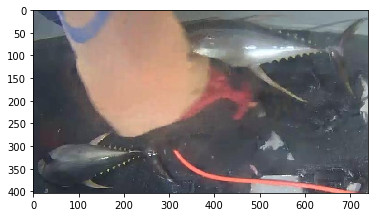

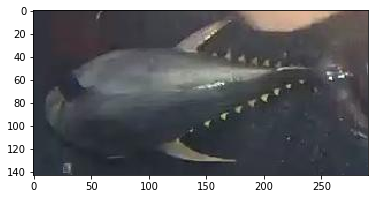

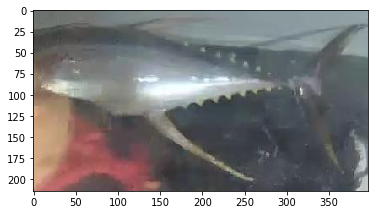

In [9]:
import matplotlib.pyplot as plt
img = Image.open('/a/data/fisheries_monitoring/data/classifiers/superbox/YFT/img_05245.jpg')
plt.imshow(img)
plt.show()
img = Image.open('/a/data/fisheries_monitoring/data/classifiers/cropped_from_origin/YFT/img_05245-1.jpg')
plt.imshow(img)
plt.show()
img = Image.open('/a/data/fisheries_monitoring/data/classifiers/cropped_from_origin/YFT/img_05245-0.jpg')
plt.imshow(img)
plt.show()